# PetFinder.my Adoption Prediction

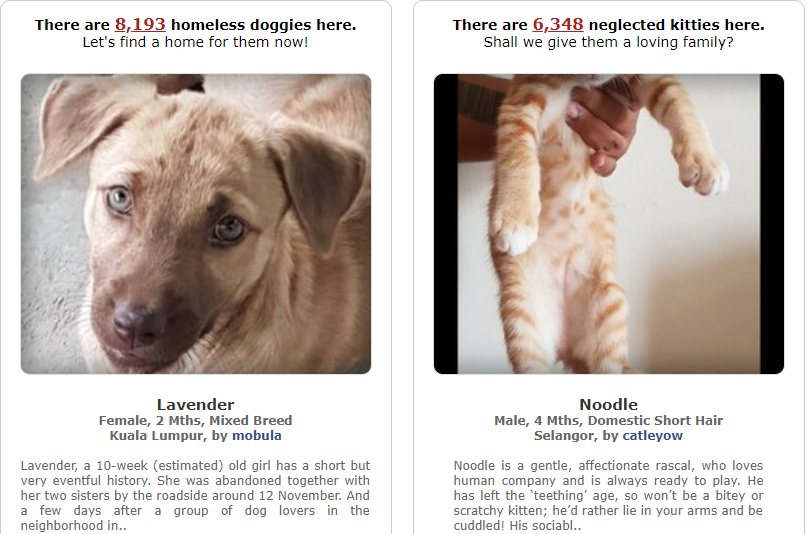

In [92]:
from IPython.display import Image, display

display(Image(filename = '/Users/yc00027/Documents/pet-project/rvSWCYO.png'))

## EDA and feature engineering

In [158]:
# Import necessary modules

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load train and test datasets

train = pd.read_csv('/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/train/train.csv')
test = pd.read_csv('/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/test/test.csv')

# Load labels dictionaries

labels_breed = pd.read_csv('/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/breed_labels.csv')
labels_state = pd.read_csv('/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/state_labels.csv')
labels_color = pd.read_csv('/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/color_labels.csv')

# Join train and testing data into a single dataframe

df = pd.concat([train, test], ignore_index=True, sort=False)
df = df[df['Age'] <= 180]
print('DF shape:', df.shape)
df.head()

DF shape: (18959, 24)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2.0
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0.0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3.0
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2.0
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2.0


In [159]:
# Drop text columns and unnecessary columns

text_columns = ['Name', 'Description']
drop_columns = ['PetID', 'RescuerID', 'State']

df_temp = df.drop((text_columns + drop_columns), axis=1)
print('DF shape:', df_temp.shape)
df_temp.head()

DF shape: (18959, 19)


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,0,1.0,2.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0,2.0,0.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,0,7.0,3.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,0,8.0,2.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,0,3.0,2.0


In [160]:
# Check for missing values

df_temp.isna().sum()

Type                0
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
VideoAmt            0
PhotoAmt            0
AdoptionSpeed    3972
dtype: int64

### Adoption Rate

Text(0.5, 1.0, 'Adoption speed classes counts')

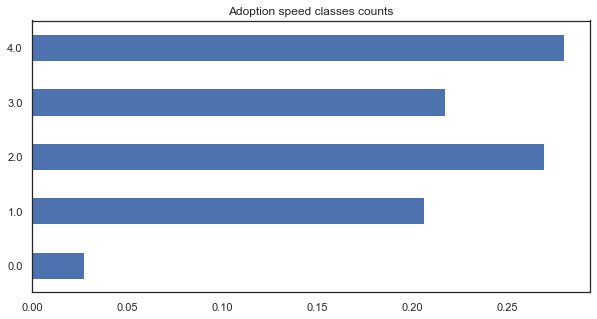

In [161]:
# Check distribution of adoption rate accross categories

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['AdoptionSpeed'].value_counts(normalize=True).sort_index().plot(kind='barh')
plt.title('Adoption speed classes counts')

### Type

In [162]:
# Check proportion of cats and dogs in train and test datasets

print(train['Type'].value_counts(normalize=True))
print(test['Type'].value_counts(normalize=True))
print(df_temp['Type'].value_counts(normalize=True))

1    0.542386
2    0.457614
Name: Type, dtype: float64
1    0.528701
2    0.471299
Name: Type, dtype: float64
1    0.53948
2    0.46052
Name: Type, dtype: float64


### Age

Text(0.5, 1.0, 'Age distribution')

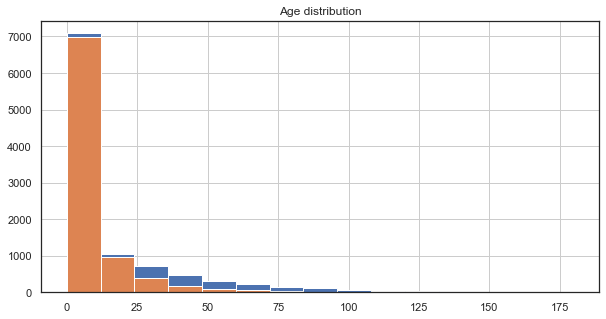

In [163]:
# Check distribution of ages in cats and dogs

fig, ax = plt.subplots(figsize=(10, 5))
df_temp[df_temp['Type'] == 1]['Age'].hist(bins=15)
df_temp[df_temp['Type'] == 2]['Age'].hist(bins=15)
plt.title('Age distribution')


### Breed

Text(0.5, 1.0, 'Main breeds distribution')

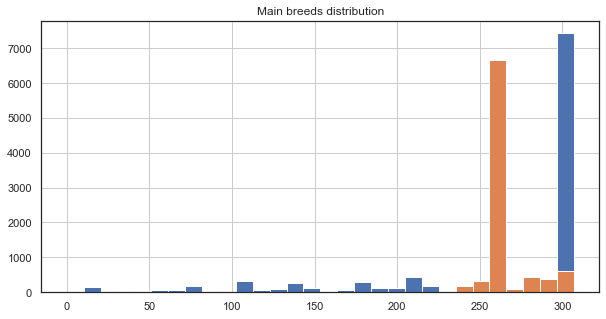

In [164]:
# Check distribution of main breeds

fig, ax = plt.subplots(figsize=(10, 5))
df_temp[df_temp['Type'] == 1]['Breed1'].hist(bins=30)
df_temp[df_temp['Type'] == 2]['Breed1'].hist(bins=30)
plt.title('Main breeds distribution')

Text(0.5, 1.0, 'Secondary breeds distribution')

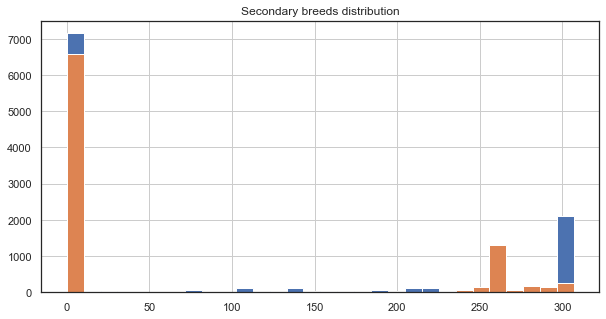

In [165]:
# Check distribution of secondary breeds

fig, ax = plt.subplots(figsize=(10, 5))
df_temp[df_temp['Type'] == 1]['Breed2'].hist(bins=30)
df_temp[df_temp['Type'] == 2]['Breed2'].hist(bins=30)
plt.title('Secondary breeds distribution')

In [166]:
# Create new binary variable to check if an animal is pure breed or mixed race

pure_breed = []

for i, row in df_temp.iterrows():
    
    if row['Breed1'] not in [307, 264, 265, 266, 299]:
        if row['Breed2'] == 0 or row['Breed2'] == row['Breed1']:
            pure_breed.append(1)
        else:
            pure_breed.append(0)
    else:
        pure_breed.append(0)
        
df_temp['pure_breed'] = pure_breed

print(df_temp['pure_breed'].value_counts())

0    16519
1     2440
Name: pure_breed, dtype: int64


### Gender

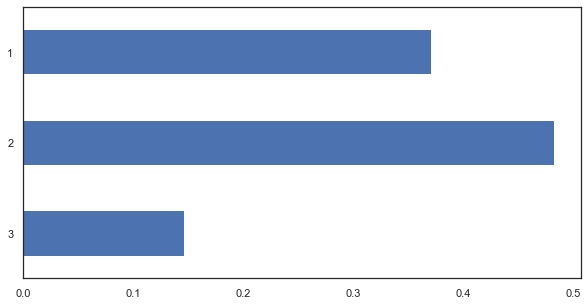

In [167]:
# Check gender distribution

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['Gender'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh')

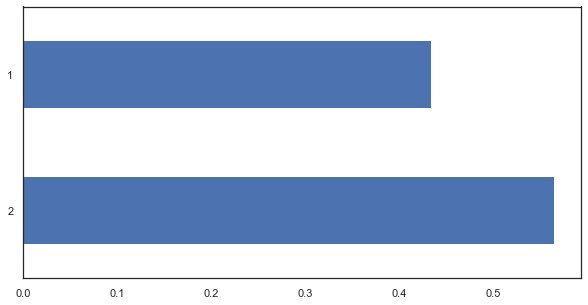

In [168]:
# Check male/female split

fig, ax = plt.subplots(figsize=(10, 5))
df_temp.loc[df_temp['Gender'] < 3, 'Gender'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh')

### Quantity

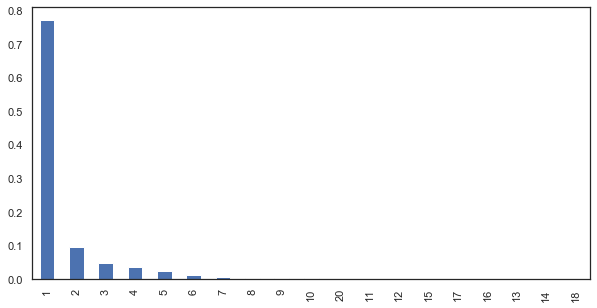

In [169]:
# Check quantity distribution on train set

fig, ax = plt.subplots(figsize=(10, 5))
train['Quantity'].value_counts(normalize=True).plot(kind='bar')

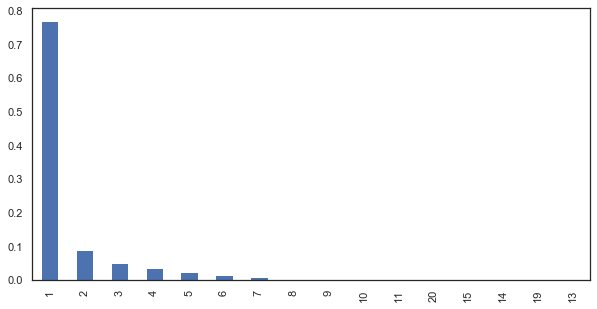

In [170]:
# Check quantity distribution on test set

fig, ax = plt.subplots(figsize=(10, 5))
test['Quantity'].value_counts(normalize=True).plot(kind='bar')

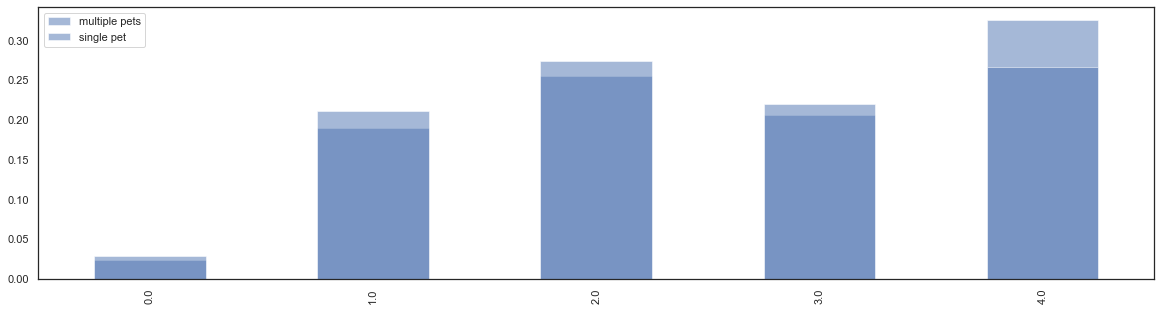

In [171]:
# Check if adoption speed is slower for ads with multiple pets

fig, ax = plt.subplots(figsize=(20, 5))
df_temp.loc[df_temp['Quantity'] > 1, 'AdoptionSpeed'].value_counts(normalize=True).sort_index().plot(ax=ax, kind='bar', alpha=0.5, label='multiple pets')
df_temp.loc[df_temp['Quantity'] == 1, 'AdoptionSpeed'].value_counts(normalize=True).sort_index().plot(ax=ax, kind='bar', alpha=0.5, label='single pet')
plt.legend()

In [172]:
# Unpack ads with multiple pets into a row per pet

dataset = df_temp
duplicated_rows = []
index = 0
for i, row in dataset.loc[dataset['Quantity'] > 1].iterrows():
    row_df = pd.DataFrame([row] * int(row['Quantity'])).reset_index(drop=True)
    half_index = round(row_df.shape[0] / 2)
    row_df.iloc[:half_index]['Gender'] = 0
    row_df.iloc[half_index:]['Gender'] = 1
    row_df['layer'] = index
    index += 1
    duplicated_rows.append(row_df)

duplicated_rows = pd.concat(duplicated_rows)

print(duplicated_rows.shape)
duplicated_rows.head()

/Users/yc00027/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/yc00027/py3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(15348, 21)


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,pure_breed,layer
0,1.0,0.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,0.0,0.0,9.0,3.0,0.0,0
1,1.0,0.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,0.0,0.0,9.0,3.0,0.0,0
2,1.0,0.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,0.0,0.0,9.0,3.0,0.0,0
3,1.0,0.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,0.0,0.0,9.0,3.0,0.0,0
4,1.0,0.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,0.0,0.0,9.0,3.0,0.0,0


### Colors

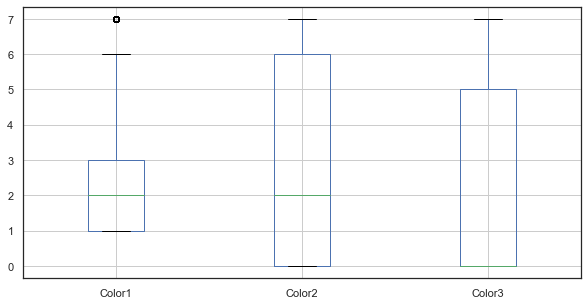

In [173]:
# Check the spread of main color and secondary colors

fig, ax = plt.subplots(figsize=(10, 5))
df_temp.boxplot(column=['Color1', 'Color2', 'Color3'])

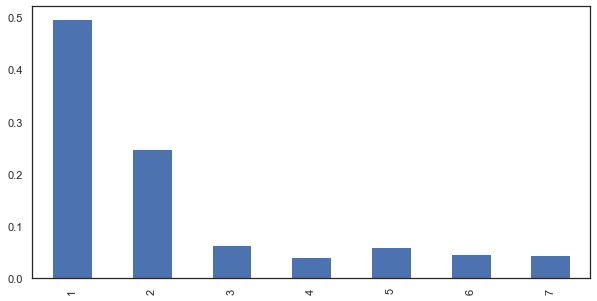

In [174]:
# Check main color distribution

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['Color1'].value_counts(normalize=True).sort_index().plot(kind='bar')

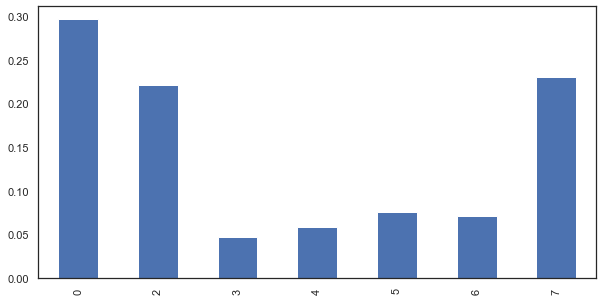

In [175]:
# Check secondary color distribution

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['Color2'].value_counts(normalize=True).sort_index().plot(kind='bar')

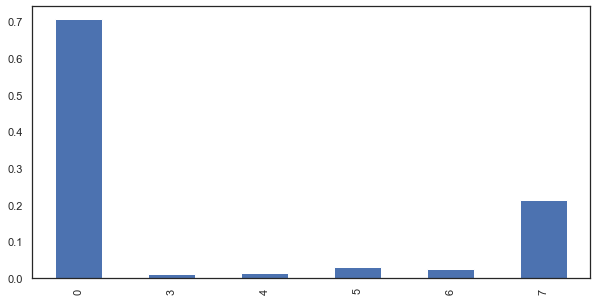

In [176]:
# Check terciary color distribution

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['Color3'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [177]:
# Create new variable to check if an animal is one color or multicolor

multicolor = []

for i, row in df_temp.iterrows():
    if row['Color2'] != 0 and row['Color3'] != 0:
        multicolor.append(1)
    elif row['Color2'] != 0 and row['Color3'] == 0:
        multicolor.append(1)
    else:
        multicolor.append(0)

df_temp['multicolor'] = multicolor

In [178]:
# Create new variable to check the pet's color mix

color_mix = []

for i, row in df_temp.iterrows():
    color_string = str(row['Color1']) + str(row['Color2']) + str(row['Color3'])
    color = int(color_string.replace('.0', ''))
    color_mix.append(color)

df_temp['color_mix'] = color_mix

### Fee

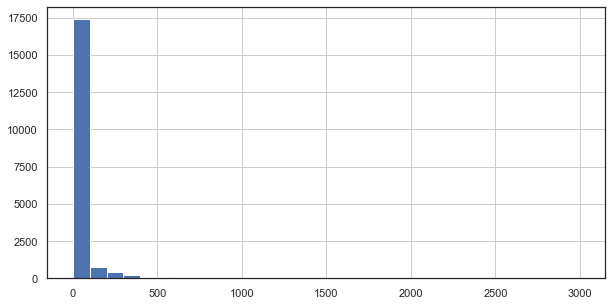

In [179]:
# Check fee distribution

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['Fee'].hist(bins=30)

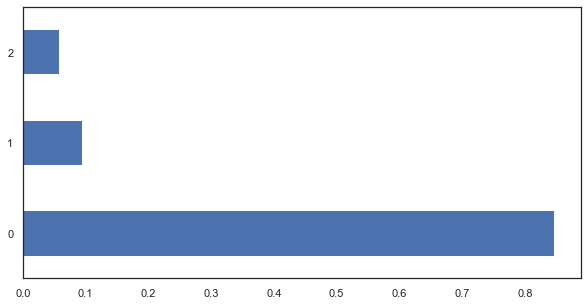

In [180]:
# Create new variable to split free, cheap and expensive pets

new_fee = []

for i, row in df_temp.iterrows():
    if row['Fee'] == 0:
        new_fee.append(0)
    elif row['Fee'] > 100:
        new_fee.append(2)
    else:
        new_fee.append(1)

df_temp['new_fee'] = new_fee

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['new_fee'].value_counts(normalize=True).sort_index().plot(kind='barh')

### Size at maturity

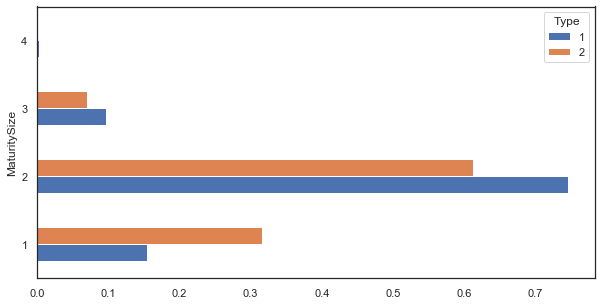

In [181]:
# Check size at maturity distribution by type

df_temp.groupby('Type')['MaturitySize'].value_counts(normalize=True).sort_index(level=[0,1], ascending=False).unstack(0).plot.barh(figsize=(10, 5))

### Ads Media 

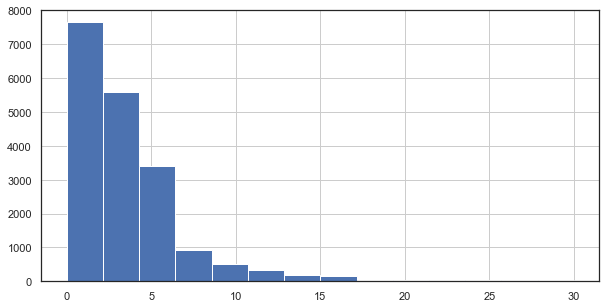

In [182]:
# Check distribution of number of photos in the ad

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['PhotoAmt'].hist(bins=14)

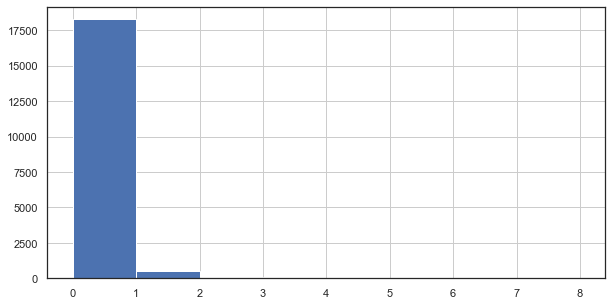

In [183]:
# Check distribution of number of videos in the ad

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['VideoAmt'].hist(bins=8)

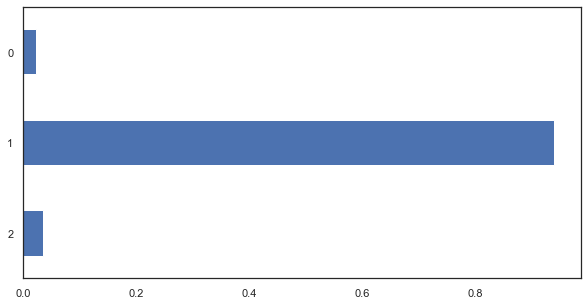

In [184]:
# Create new variable to split the ads into no media, only photos, photos and video

media = []

for i, row in df_temp.iterrows():
    if row['PhotoAmt'] == 0 and row['VideoAmt'] == 0:
        media.append(0)
    elif row['PhotoAmt'] > 0 and row['VideoAmt'] > 0:
        media.append(2)
    else:
        media.append(1)

df_temp['media'] = media

fig, ax = plt.subplots(figsize=(10, 5))
df_temp['media'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh')

### Description

In [185]:
# Create variables for comprehensibility of the description

train['Description'] = train['Description'].fillna('')
test['Description'] = test['Description'].fillna('')
df['Description'] = df['Description'].fillna('')

train['desc_length'] = train['Description'].apply(lambda x: len(x))
train['desc_words'] = train['Description'].apply(lambda x: len(x.split()))

test['desc_length'] = test['Description'].apply(lambda x: len(x))
test['desc_words'] = test['Description'].apply(lambda x: len(x.split()))

df_temp['desc_length'] = df['Description'].apply(lambda x: len(x))
df_temp['desc_words'] = df['Description'].apply(lambda x: len(x.split()))

train['average_word_length'] = train['desc_length'] / train['desc_words']
test['average_word_length'] = test['desc_length'] / test['desc_words']
df_temp['average_word_length'] = df_temp['desc_length'] / df_temp['desc_words']
df_temp['average_word_length'] = df_temp['average_word_length'].fillna(0)

In [186]:
# Import sentiment data

import os
import json

train_sentiment_path = '/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/train_sentiment'
test_sentiment_path = '/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/test_sentiment'

sentiment_dict = {}
for filename in os.listdir(train_sentiment_path):
    with open(train_sentiment_path + '/' + filename, 'r') as f:
        sentiment = json.load(f)
    pet_id = filename.split('.')[0]
    sentiment_dict[pet_id] = {}
    sentiment_dict[pet_id]['magnitude'] = sentiment['documentSentiment']['magnitude']
    sentiment_dict[pet_id]['score'] = sentiment['documentSentiment']['score']
    sentiment_dict[pet_id]['language'] = sentiment['language']

for filename in os.listdir(test_sentiment_path):
    with open(test_sentiment_path + '/' + filename, 'r') as f:
        sentiment = json.load(f)
    pet_id = filename.split('.')[0]
    sentiment_dict[pet_id] = {}
    sentiment_dict[pet_id]['magnitude'] = sentiment['documentSentiment']['magnitude']
    sentiment_dict[pet_id]['score'] = sentiment['documentSentiment']['score']
    sentiment_dict[pet_id]['language'] = sentiment['language']

In [187]:
train['magnitude'] = train['PetID'].apply(lambda x: sentiment_dict[x]['magnitude'] if x in sentiment_dict else 0)
train['score'] = train['PetID'].apply(lambda x: sentiment_dict[x]['score'] if x in sentiment_dict else 0)

test['magnitude'] = test['PetID'].apply(lambda x: sentiment_dict[x]['magnitude'] if x in sentiment_dict else 0)
test['score'] = test['PetID'].apply(lambda x: sentiment_dict[x]['score'] if x in sentiment_dict else 0)

df_temp['magnitude'] = df['PetID'].apply(lambda x: sentiment_dict[x]['magnitude'] if x in sentiment_dict else 0)
df_temp['score'] = df['PetID'].apply(lambda x: sentiment_dict[x]['score'] if x in sentiment_dict else 0)

### Name

In [188]:
# Replace null values, no names and meaningless names

df['Name'] = df['Name'].fillna('nameless')

# Identify pets with no names

string_contains_name = df[df['Name'].str.contains('name')]['Name'].unique()
string_contains_Name = df[df['Name'].str.contains('Name')]['Name'].unique()

string_contains_dog = df[df['Name'].str.contains('dog')]['Name'].unique()
string_contains_Dog = df[df['Name'].str.contains('Dog')]['Name'].unique()

string_contains_cat = df[df['Name'].str.contains('cat')]['Name'].unique()
string_contains_Cat = df[df['Name'].str.contains('Cat')]['Name'].unique()

string_contains_kitt = df[df['Name'].str.contains('kitt')]['Name'].unique()
string_contains_Kitt = df[df['Name'].str.contains('Kitt')]['Name'].unique()

string_contains_pup = df[df['Name'].str.contains('pup')]['Name'].unique()
string_contains_Pup = df[df['Name'].str.contains('Pup')]['Name'].unique()

not_alpha = [x for x in df['Name'] if any(c.isdigit() for c in x)]
meaningless_names = df[df['Name'].apply(lambda x: len(str(x))) < 3]['Name'].unique()

In [189]:
# Create list of meaningless or no names

no_name = list(string_contains_name) + list(string_contains_Name) + list(string_contains_dog) + \
          list(string_contains_Dog) + list(string_contains_cat) + list(string_contains_Cat) + \
          list(string_contains_kitt) + list(string_contains_Kitt) + list(string_contains_pup) + \
          list(string_contains_Pup) + list(meaningless_names) + list(not_alpha)

# Replace meaningless or no names

df['Final_Name'] = np.where(df['Name'].isin(no_name), 'nameless', df['Name'])

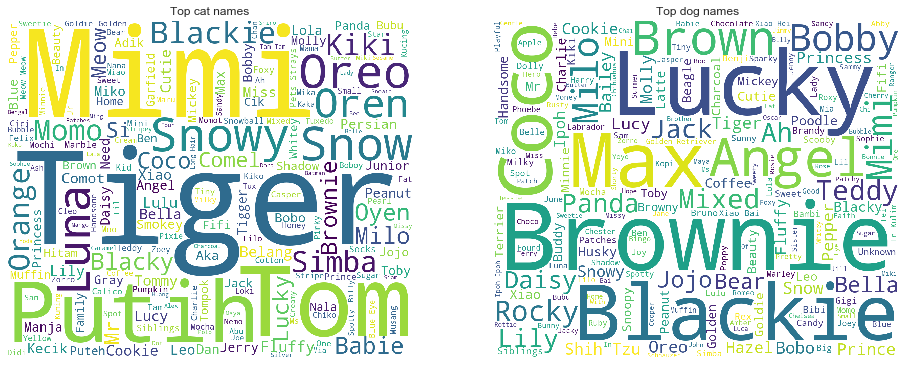

In [190]:
# Generate names wordcloud

from wordcloud import WordCloud 

stopwords = no_name + ['Little', 'Boy', 'And', 'Kitty', 'Pup', 'For', 'Adoption', 'Girl', 'The', 'Doggie', 'Pup',
                      'Male', 'male', 'Female', 'female', 'Mix', 'Breed', 'Cute', 'White', 'Black', 'Grey',
                      'Baby', 'Ginger', 'Puppy', 'Kittie', 'Mived', 'Urgent', 'Siamese', 'Baby', 'Tabby', 'Kitties',
                      'Old', 'Happy', 'Sibling', 'Tag', 'Free', 'No']


fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(df.loc[df['Type'] == 2, 'Final_Name'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000, stopwords = stopwords).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(df.loc[df['Type'] == 1, 'Final_Name'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000, stopwords = stopwords).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [191]:
# Create new variable to check if pet is named or not

name = []

for i, row in df.iterrows():
    if row['Final_Name'] == 'nameless' :
        name.append(0)
    else:
        name.append(1)

df_temp['name'] = name

df_temp['name'].value_counts()

1    14035
0     4924
Name: name, dtype: int64

### Correlation between variables

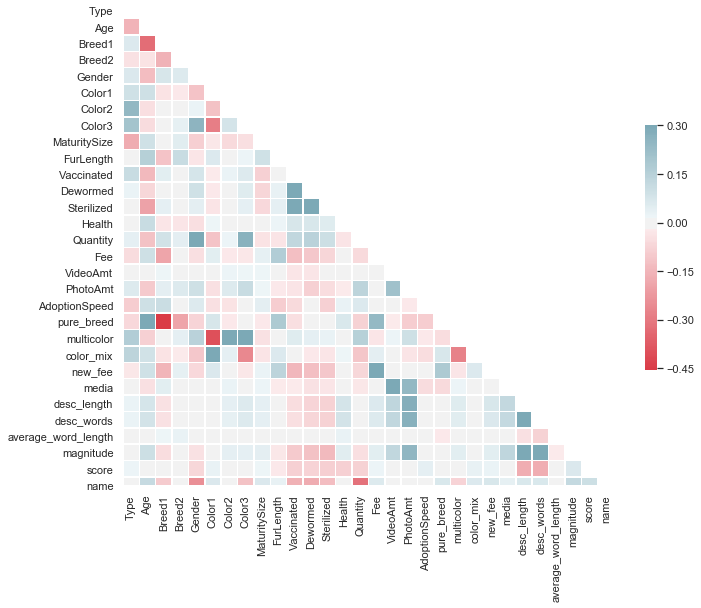

In [192]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Variable encoding

In [193]:
# One-hot encode categorical columns

onehot_columns = df_temp[['Type', 'Gender', 'Color1', 'Color2',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 
       'Health', 'pure_breed', 'multicolor', 'new_fee', 'media', 'name']]

onehot_df = pd.get_dummies(onehot_columns, columns = onehot_columns.columns)
onehot_df.head()

,Type_1,Type_2,Gender_1,Gender_2,Gender_3,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3,pure_breed_0,pure_breed_1,multicolor_0,multicolor_1,new_fee_0,new_fee_1,new_fee_2,media_0,media_1,media_2,name_0,name_1
0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1


In [194]:
# Binary encode categorical columns with more than 10 classes

import category_encoders as ce

binary_columns = df_temp[['Breed1', 'color_mix']]

encoder = ce.BinaryEncoder(cols=['Breed1', 'color_mix'])
binary_df = encoder.fit_transform(binary_columns)

binary_df.head()

,Breed1_0,Breed1_1,Breed1_2,Breed1_3,Breed1_4,Breed1_5,Breed1_6,Breed1_7,Breed1_8,color_mix_0,color_mix_1,color_mix_2,color_mix_3,color_mix_4,color_mix_5,color_mix_6
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [195]:
# Standardize continuous variables

from sklearn.preprocessing import MinMaxScaler

cont_df = df_temp[['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt', 'desc_length', 
                'desc_words', 'average_word_length', 'magnitude']]

min_max = MinMaxScaler()
cont_scaled = min_max.fit_transform(cont_df)
cont_scaled_df = pd.DataFrame(cont_scaled, index=cont_df.index, columns=cont_df.columns)

cont_scaled_df.head()

,Age,Quantity,Fee,VideoAmt,PhotoAmt,desc_length,desc_words,average_word_length,magnitude
0,0.016667,0.0,0.033333,0.0,0.033333,0.053872,0.054893,0.044660,0.075000
1,0.005556,0.0,0.000000,0.0,0.066667,0.017707,0.018298,0.044038,0.021875
2,0.005556,0.0,0.000000,0.0,0.233333,0.058974,0.054893,0.048890,0.115625
3,0.022222,0.0,0.050000,0.0,0.266667,0.021909,0.019889,0.050129,0.028125
4,0.005556,0.0,0.000000,0.0,0.100000,0.058523,0.064439,0.041329,0.115625


In [196]:
df_final = pd.concat([onehot_df, binary_df, cont_scaled_df, df_temp[['score', 'AdoptionSpeed']]], axis=1)

to_drop = ['Type_2', 'pure_breed_1', 'multicolor_1', 'new_fee_1', 'media_1', 'name_1']

df_final = df_final.drop(to_drop, axis=1)

print(df_final.shape)
df_final.head()

(18959, 71)


,Type_1,Gender_1,Gender_2,Gender_3,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3,pure_breed_0,multicolor_0,new_fee_0,new_fee_2,media_0,media_2,name_0,Breed1_0,Breed1_1,Breed1_2,Breed1_3,Breed1_4,Breed1_5,Breed1_6,Breed1_7,Breed1_8,color_mix_0,color_mix_1,color_mix_2,color_mix_3,color_mix_4,color_mix_5,color_mix_6,Age,Quantity,Fee,VideoAmt,PhotoAmt,desc_length,desc_words,average_word_length,magnitude,score,AdoptionSpeed
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.016667,0.0,0.033333,0.0,0.033333,0.053872,0.054893,0.044660,0.075000,0.3,2.0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.005556,0.0,0.000000,0.0,0.066667,0.017707,0.018298,0.044038,0.021875,-0.2,0.0
2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0.005556,0.0,0.000000,0.0,0.233333,0.058974,0.054893,0.048890,0.115625,0.2,3.0
3,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0.022222,0.0,0.050000,0.0,0.266667,0.021909,0.019889,0.050129,0.028125,0.9,2.0
4,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.005556,0.0,0.000000,0.0,0.100000,0.058523,0.064439,0.041329,0.115625,0.6,2.0


## Split training and test data

In [197]:
# Split one-hot encoded dataframe into training and test datasets

train_data = df_final.loc[df_final['AdoptionSpeed'].notnull()]
test_data = df_final.loc[df_final['AdoptionSpeed'].isnull()]
print(train_data.shape)
print(test_data.shape)

(14987, 71)
(3972, 71)


In [198]:
# Drop unnecessary columns and define features and targets from training and test datasets

X_train = train_data.drop('AdoptionSpeed', axis=1)
y_train = train_data['AdoptionSpeed']
y_train_onehot = pd.get_dummies(train_data['AdoptionSpeed'])

X_test = test_data.drop('AdoptionSpeed', axis=1)
y_test = test_data['AdoptionSpeed']
y_test_onehot = pd.get_dummies(test_data['AdoptionSpeed'])

## Randomized CV search with XGB Classifier

In [199]:
# Import necessary modules

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Instatiate XGB classifier

xgb = XGBClassifier(objective='multi:softmax', n_classes=5)

# Define hyper parameters for Randomized Search

params = {
    'learning_rate': (np.geomspace(1e-2, 1)),
    'max_depth': (range(1, 10)),
    'gamma': (np.geomspace(1e-2, 1)),
    'min_child_weight': (range(1, 10)),
    'n_estimators': (range(30, 300)),
    'reg_alpha': (np.linspace(0.2, 1)),
    'reg_lambda': (np.linspace(0.2, 2)),
    'subsample': (np.linspace(0.6,1.0)),
    'colsample_bytree': (np.linspace(0.6, 1.0))
}

# Define the metric to evaluate the model

kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score, weights='quadratic')

In [200]:
# Perform randomized search to obtain best parameters (I did it once, took 2 hours. Obtained parameters below.)

clf = RandomizedSearchCV(xgb, params, scoring=kappa_scorer, random_state=1, n_iter=25, cv=5, verbose=0, n_jobs=-1)
#clf_fit = clf.fit(X_train, y_train)

# print('\n Best estimator:')
# print(clf.best_estimator_)
# print('\n Best score:')
# print(clf.best_score_)
# print('\n Best hyperparameters:')
# print(clf.best_params_)

In [201]:
# Select best hyper parameters 

best_params = {'subsample': 0.7061224489795919, 'reg_lambda': 1.0081632653061225, 'reg_alpha': 0.4775510204081633, 
               'n_estimators': 250, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.04941713361323833, 
               'gamma': 0.054286754393238594, 'colsample_bytree': 0.7877551020408163}

# Instantiate and fit the model using best parameters

xgb_bst = XGBClassifier(objective='multi:softmax', n_classes=5, **best_params)
bst_fit = xgb_bst.fit(X_train, y_train)

# Generate predictions

bst_preds = bst_fit.predict(X_test)

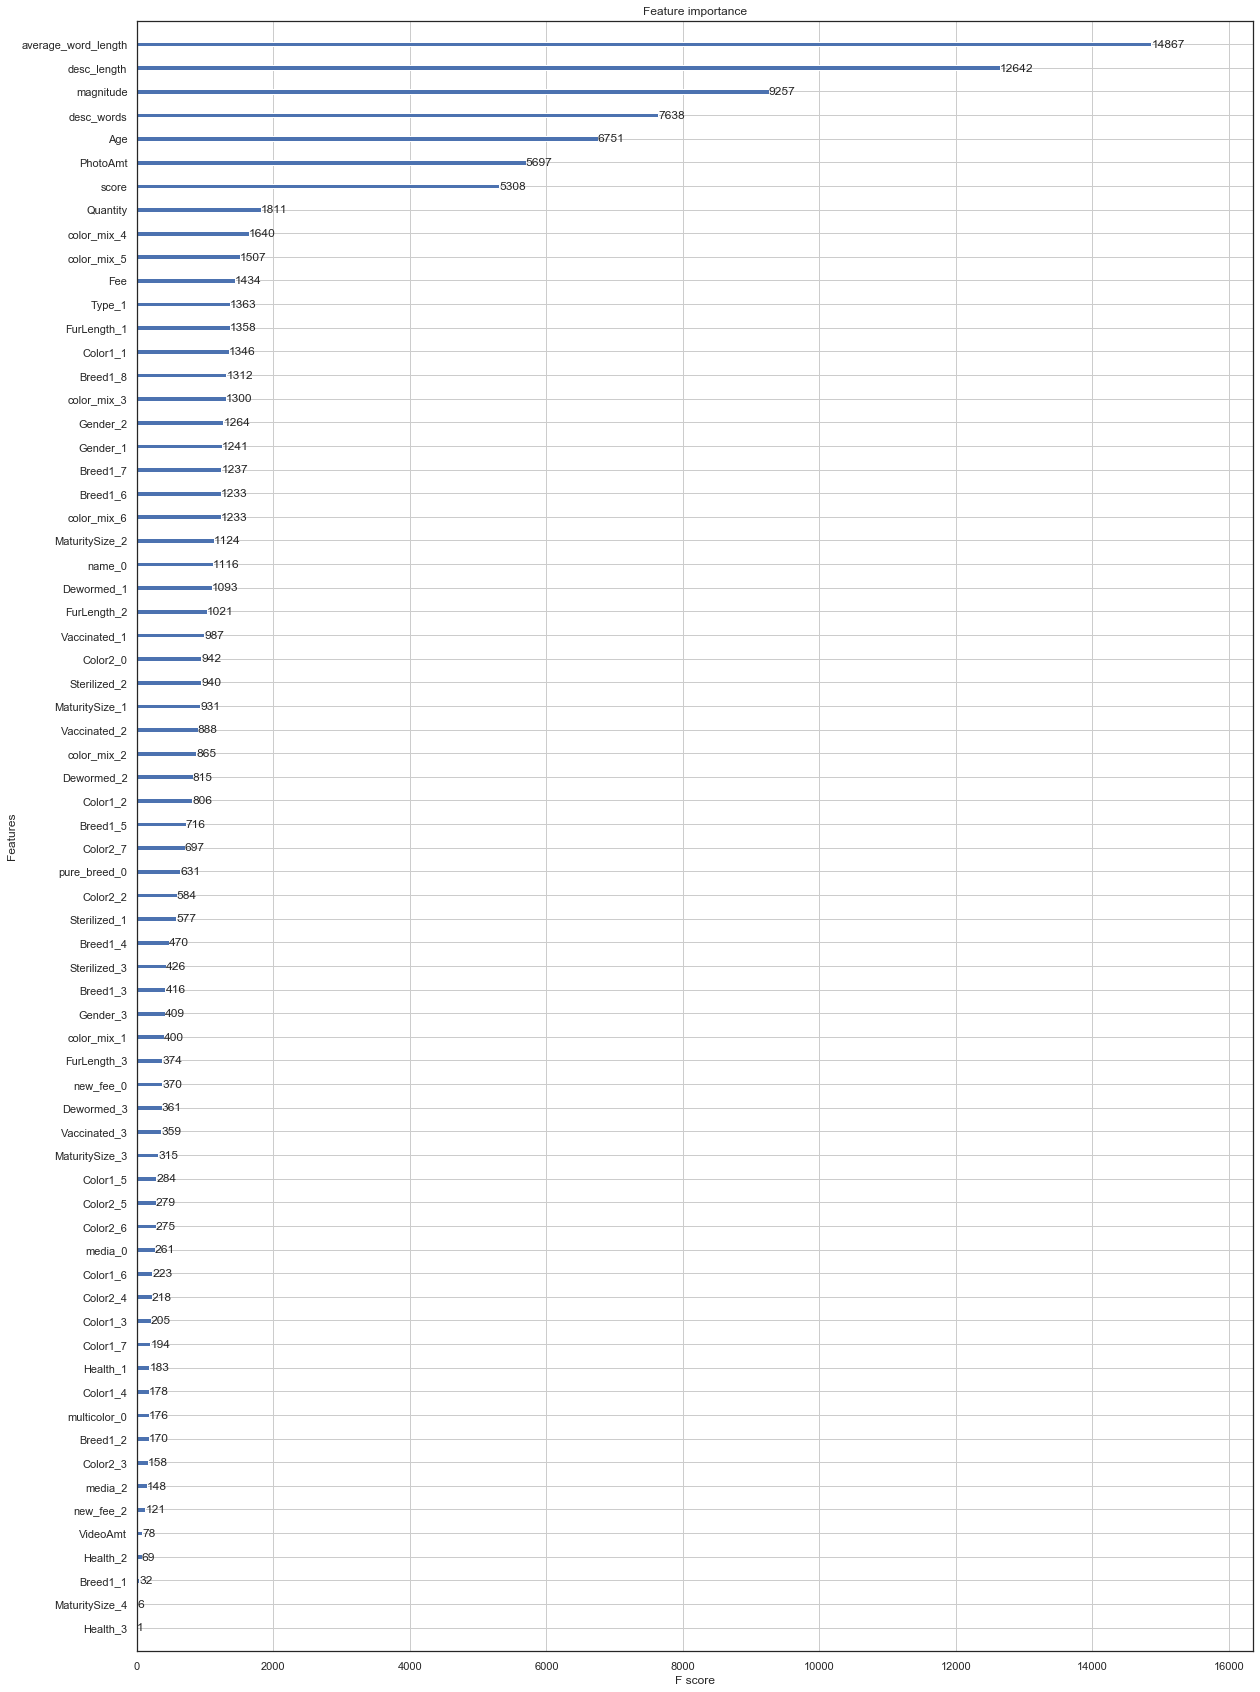

In [202]:
# Plot feature importance

from xgboost import plot_importance

plt.rcParams["figure.figsize"] = (20, 30)
plot_importance(xgb_bst)
plt.show()

In [203]:
from sklearn.feature_selection import SelectFromModel

# Fit model using feature importances as thresholds
thresholds = sorted(bst_fit.feature_importances_, reverse=True)[:25]

for thresh in thresholds:
    selection = SelectFromModel(bst_fit, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Train model
    selection_model = XGBClassifier(objective='multi:softmax', n_classes=5, **best_params)
    selection_model.fit(select_X_train, y_train)
    
    # Generate predictions
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]

In [ ]:
predictions = pd.DataFrame(predictions, columns = ['AdoptionSpeed'], index = df.loc[df['AdoptionSpeed'].isnull(), 'PetID'])
predictions.head()

In [ ]:
export_csv = predictions.astype(int).to_csv(r'/Users/yc00027/Documents/Project2/petfinder-adoption-prediction/test/predictions.csv', header=True)

## Neural Network Classifier

In [ ]:
# Create custom quadratic kappa loss function

import torch
import torch.nn as nn

import tensorflow as tf

def kappa_loss(y_pred, y_true, y_pow=2, eps=1e-10, N=5, bsize=256, name='kappa'):
    """A continuous differentiable approximation of discrete kappa loss.
        Args:
            y_pred: 2D tensor or array, [batch_size, num_classes]
            y_true: 2D tensor or array,[batch_size, num_classes]
            y_pow: int,  e.g. y_pow=2
            N: typically num_classes of the model
            bsize: batch_size of the training or validation ops
            eps: a float, prevents divide by zero
            name: Optional scope/name for op_scope.
        Returns:
            A tensor with the kappa loss."""

    with tf.name_scope(name):
        y_true = tf.cast(y_true, dtype=tf.float32)
        repeat_op = tf.cast((tf.tile(tf.reshape(tf.range(0, N), [N, 1]), [1, N])), dtype=tf.float32)
        repeat_op_sq = tf.square((repeat_op - tf.transpose(repeat_op)))
        weights = repeat_op_sq / tf.cast(((N - 1) ** 2), dtype=tf.float32)
    
        pred_ = y_pred ** y_pow
        try:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [-1, 1]))
        except Exception:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [bsize, 1]))
    
        hist_rater_a = tf.reduce_sum(pred_norm, 0)
        hist_rater_b = tf.reduce_sum(y_true, 0)
    
        conf_mat = tf.matmul(tf.transpose(pred_norm), y_true)
    
        nom = tf.reduce_sum(weights * conf_mat)
        denom = tf.reduce_sum(weights * tf.matmul(
            tf.reshape(hist_rater_a, [N, 1]), tf.reshape(hist_rater_b, [1, N])) /
                              tf.cast((bsize),dtype=tf.float32))
    
        return nom / (denom + eps)

In [ ]:
# Instantiate and fit neural network

from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

#First Hidden Layer
classifier.add(Dense(9, activation = 'relu', input_dim=70))

#Second  Hidden Layer
classifier.add(Dense(7, activation = 'relu'))

#Output Layer, 5 labels to classify
classifier.add(Dense(5, activation = 'softmax'))

#Compile the neural network using loss binary cross-entropy because it’s a binary problem
classifier.compile(optimizer = 'adam', loss = kappa_loss, metrics = ['accuracy'])

#Fit the data to the training dataset
classifier.fit(X_train, y_train_onehot, batch_size = 10, epochs = 100)
eval_model = classifier.evaluate(X_train, y_train_onehot)

#Generate predictions
y_pred=classifier.predict(X_test)